In [6]:
import numpy as np
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

import h5py
import corner

%load_ext autoreload
%autoreload 2
import plotter
import emulator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def plot_stats(statistic, data_dir, nmocks=100, nbins=9):
    plt.figure(figsize=(10,8)) 
    ps = []
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, nmocks)

    for n in range(1, nmocks+1):
        color=plt.cm.rainbow(color_idx[n-1])
        zz = np.random.randint(nmocks)
        fn = '{}/{}_minerva_n{}.dat'.format(data_dir, statistic, n)
        r, p = np.loadtxt(fn, delimiter=',',unpack=True)
        plt.plot(r[:nbins], p[:nbins], color=color, lw=1, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)")
    
    if statistic == 'upf':
        plt.ylabel(r"P$_U$(r)")
        
    elif statistic == 'wp':
        plt.ylabel(r'$w_p$($r_p$)')
        plt.xscale('log')

In [3]:
# aka Correlation Matrix
def reduced_covariance(covmat):
    covmat = np.array(covmat)
    Nb = covmat.shape[0]
    reduced = np.zeros_like(covmat)
    for i in range(Nb):
        ci = covmat[i][i]
        for j in range(Nb):
            cj = covmat[j][j]
            reduced[i][j] = covmat[i][j]/np.sqrt(ci*cj)
    return reduced


# The prefactor unbiases the inverse; see e.g. Pearson 2016
def inverse_covariance(covmat, N):
    inv = np.linalg.inv(covmat)
    Nb = covmat.shape[0]
    prefac = float(N - Nb - 2)/float(N - 1)
    return prefac * inv

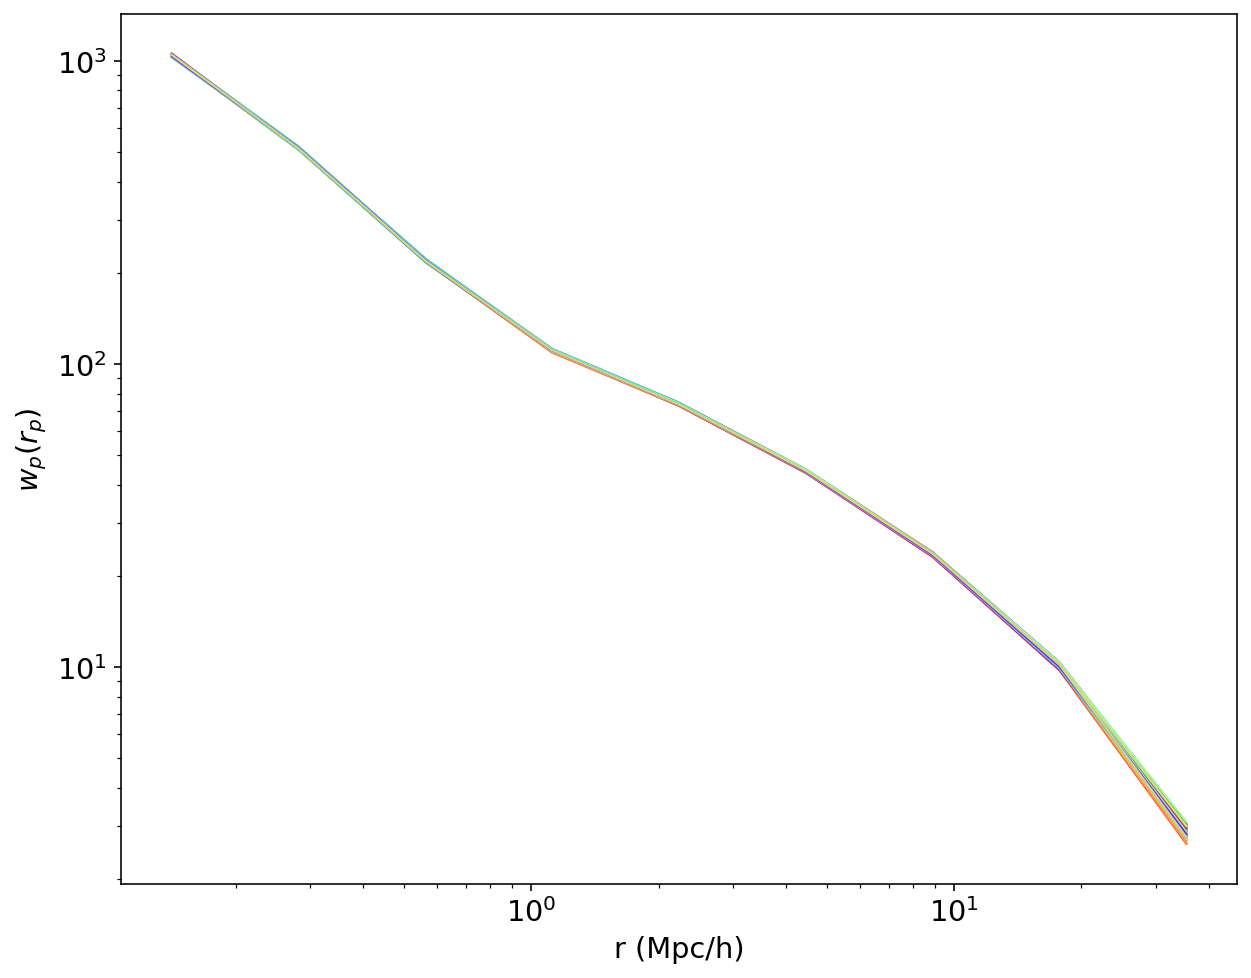

In [4]:
statistic='wp'
data_dir = '../../clust/results_minerva/results_minerva_{}'.format(statistic)
plot_stats(statistic, data_dir)

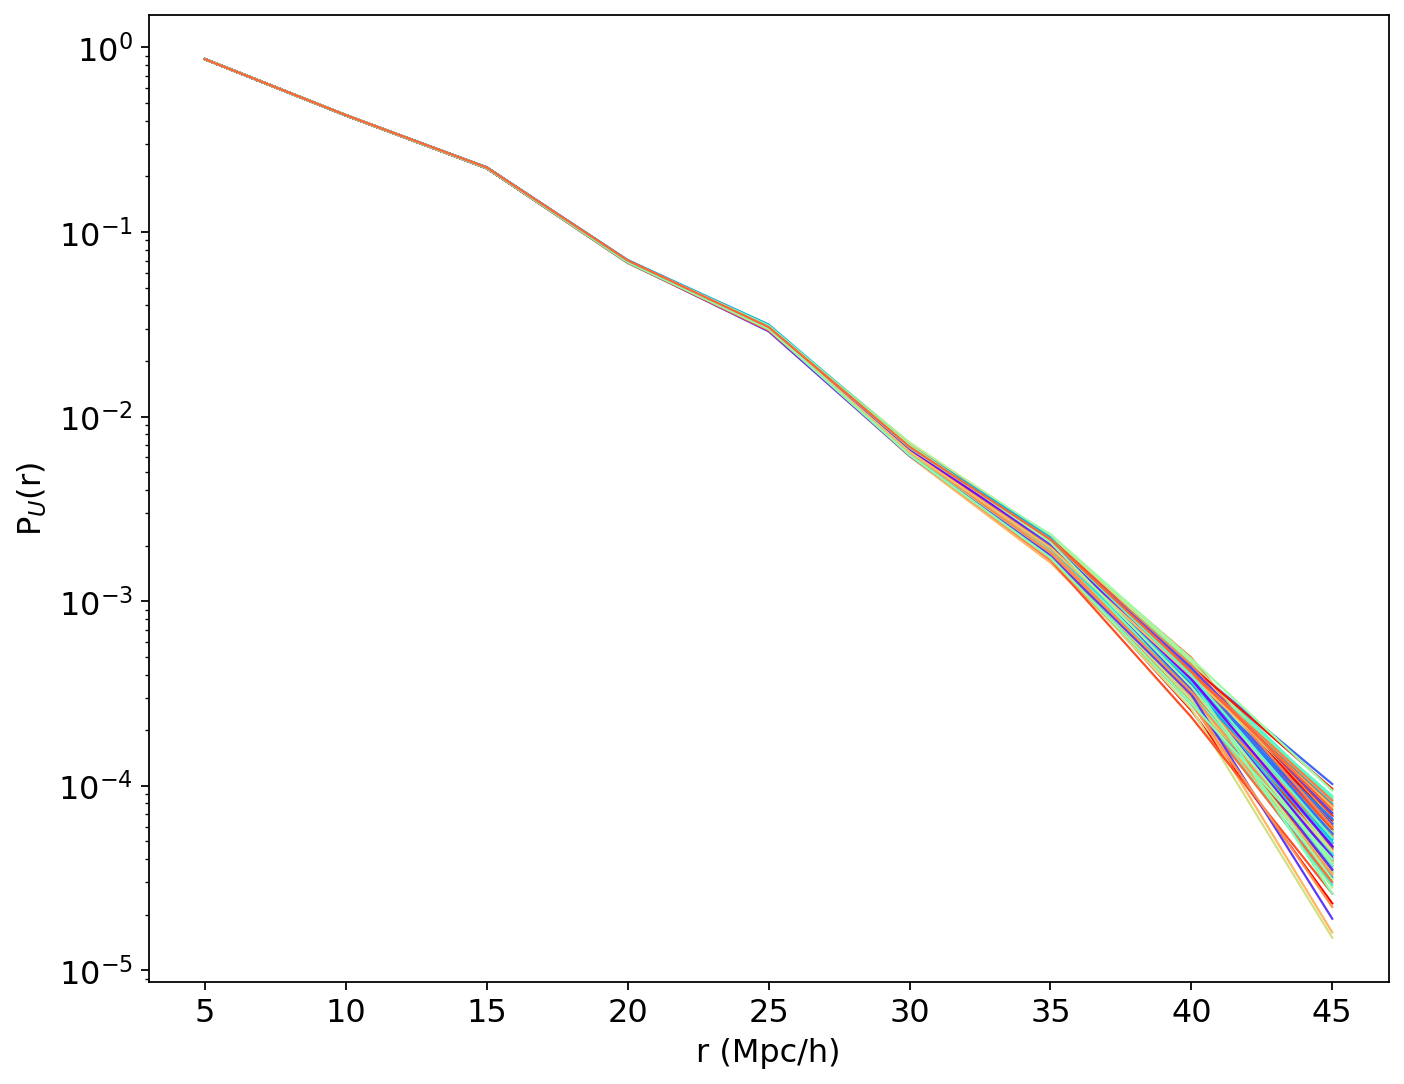

In [7]:
statistic='upf'
data_dir = '../../clust/results_minerva/results_minerva_{}'.format(statistic)
plot_stats(statistic, data_dir)

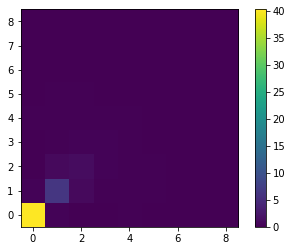

In [38]:
cov_wp = np.loadtxt(f'../../clust/results_minerva/covariance_minerva_{statistic}.dat')
plt.imshow(cov_wp, origin='lower left')
plt.colorbar()

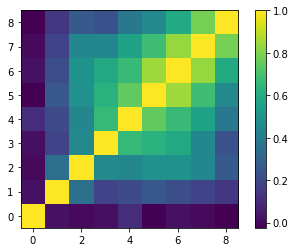

In [39]:
plt.imshow(reduced_covariance(cov_wp), origin='lower left')
plt.colorbar()

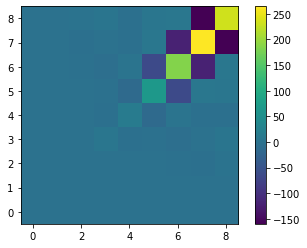

In [40]:
plt.imshow(inverse_covariance(cov_wp, 100), origin='lower left')
plt.colorbar()

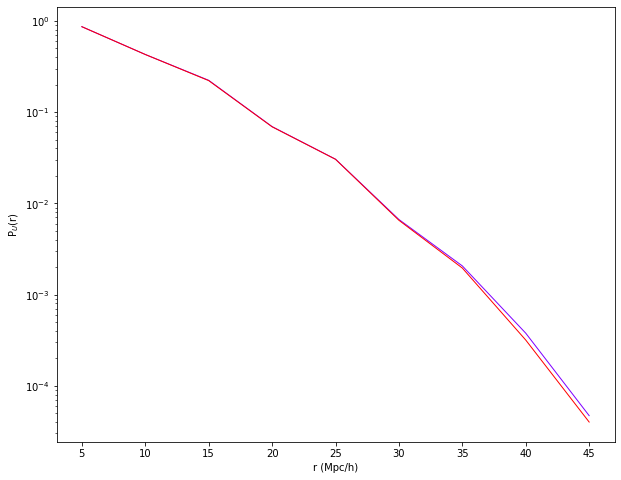

In [43]:
statistic='upf'
data_dir = '../../clust/results_minerva/results_minerva_{}'.format(statistic)
plot_stats(statistic, data_dir, nmocks=2)